# Tutorial: GWOSC API

Here, we will be looking at how to use the `gwosc` library to query LIGO data around gravitational-wave events.

Confirmed events in which GWOSC data is available can be seen here: https://www.gw-openscience.org/eventapi/html/allevents/

### Set event parameters

Here we set the detector we want to retrieve data from (`detector`), the event ID for the event we want to look at (`event`) and the duration of data around the event (`duration`). In this example, we'll query 32 seconds of data around the event. You can change the detector and/or the event ID by looking at the URL above to see what is available.

In addition, we will set the GPS time of the event (`t0`) for plotting later.

In [29]:
# -- Set an event ID and corresponding GPS time
event_id = "GW150914"
t0 = 1126259462.4

#-- Choose detector as H1, L1, or V1
detector = "H1"

#-- Duration (in seconds)
duration = 32

### Import some packages

In [30]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from gwpy.timeseries import TimeSeries

### Query and download timeseries from GWOSC

We can get the relevant data URLs from GWOSC by using `get_event_urls` and specifying the event ID, detector, and duration of data requested. Then using those event URLs, we can download them locally using the `requests` library.

In [31]:
from gwosc.locate import get_event_urls
urls = get_event_urls(event_id, detector=detector, duration=duration)

# -- only download if strain data hasn't already been downloaded
for url in urls:
    filename = os.path.basename(url)
    if not os.path.exists(filename):
        print('Downloading: ' , url)
        with open(filename, 'wb') as strainfile:
            straindata = requests.get(url)
            strainfile.write(straindata.content)
            
filenames = [os.path.basename(url) for url in urls]

### Plot the raw time-series data

Now let's take the strain time series we downloaded, read in the strain data and plot it.

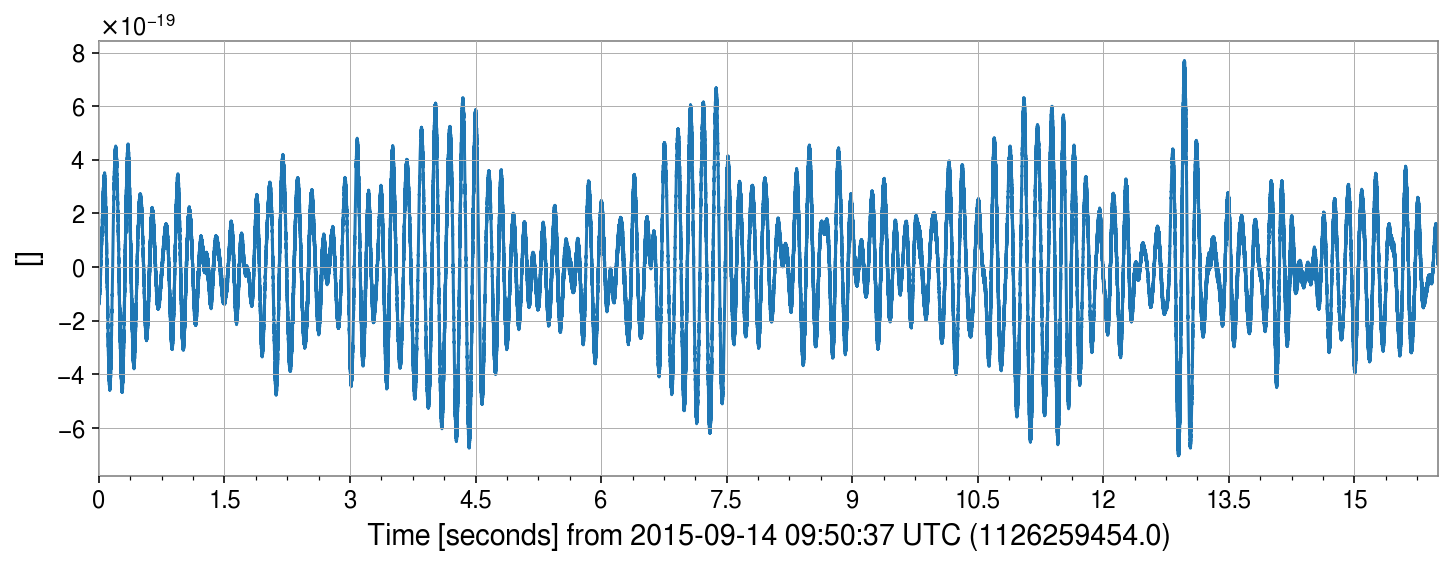

In [32]:
# -- Read strain data
strain = TimeSeries.read(filenames, format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-8, center+8)
fig1 = strain.plot()

### Plot the ASD

(1e-24, 1e-19)

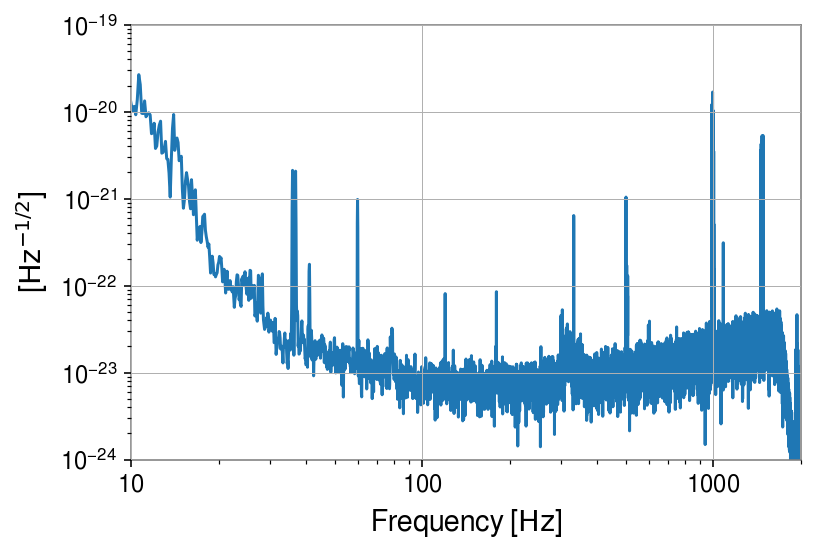

In [33]:
# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

### Whiten and band-pass the data

(1126259462.2, 1126259462.5)

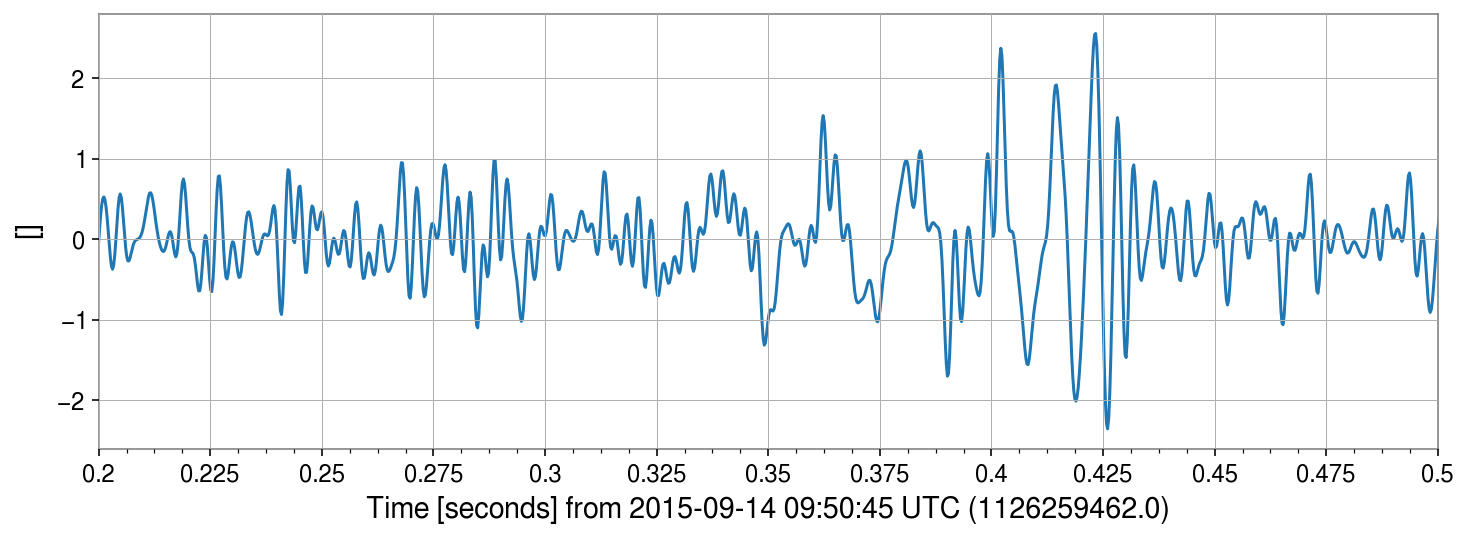

In [34]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

### Plot a time-frequency representation of the data

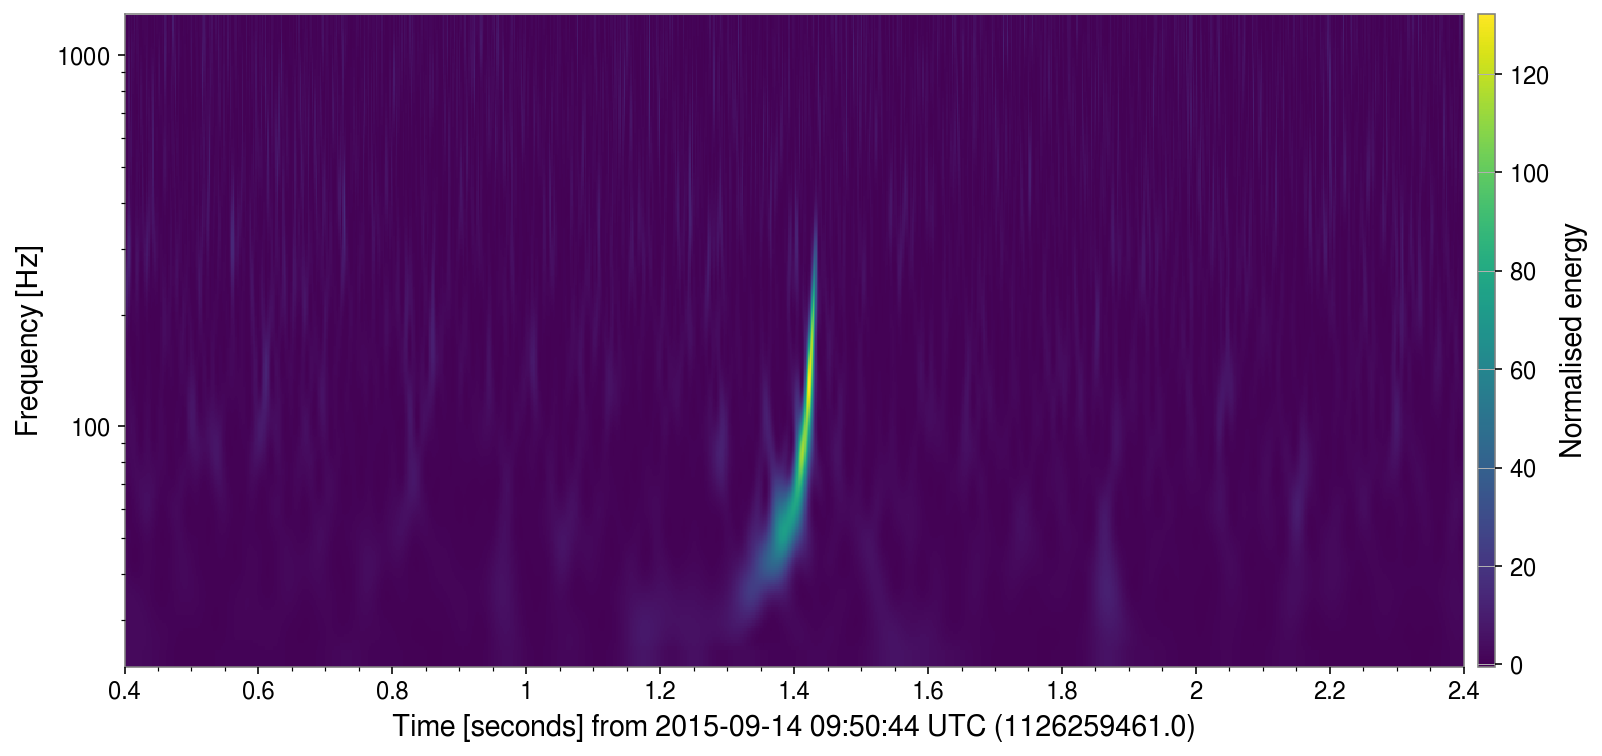

In [35]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')

### Now it's your turn to explore!

Take this tutorial notebook as a starting point, have a look in the GWOSC events page (https://www.gw-openscience.org/eventapi/html/allevents/) and start looking at different gravitational wave events. In general, their morphology (shape in the time-frequency representation) will look different.

Take a look at what the noise properties around the time of the event look like by plotting the ASD. Finally, try to plot the timeseries after whitening the data and band-passing the data and see if you can see the gravitational wave. You may need to play around with the band-pass settings and/or duration of time to focus on.

It may also be the case that it won't be able to see the gravitational wave in the timeseries due to the smaller amplitude of the event.

#### Suggested events and detectors:

* GW151226 (H1)
* GW170814 (L1)
* GW190521 (L1)
* GW190814 (L1)
* GW170817 (H1)
* GW190425 (L1)